#Import reqd Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import mnist training data and set in a dataframe
d0 = pd.read_csv('mnist_train.csv')

#print first 5 rows of the data
d0.head()



In [1]:
l = d0['label']

d = d0.drop('label',axis=1)

NameError: name 'd0' is not defined

In [3]:
# now l contains only labels data
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [4]:
#d contains only pixels data ie. after dropping labels

d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
d.shape

(42000, 784)

In [8]:
l.shape

(42000,)

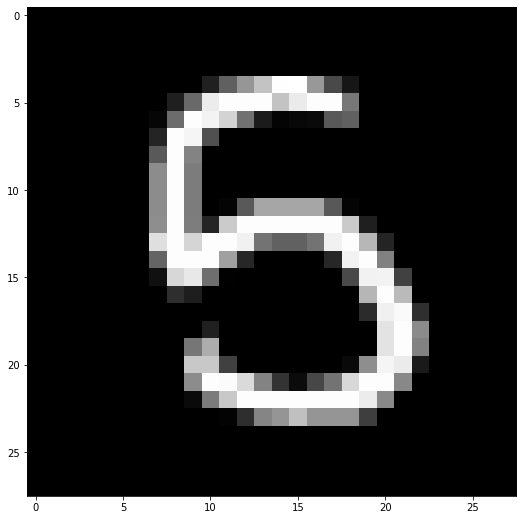

5
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 107, Length: 784, dtype: int64


In [43]:
#plot a figure

#create a 7*7 empty image
plt.figure(figsize=(9,9))
idx = 107


#loads data from dataframe d in form of pandas series and converts into a matriz of 28*28 =784 pizel points
grid_data = d.iloc[idx].values.reshape(28,28)
# use image show function to display image of the matrix grid_data
plt.imshow(grid_data,interpolation= "none" , cmap="gray")
#show image
plt.show()

print(l[idx])
print(d.iloc[idx])

As we can see above the image displayed using Matplotlib and the label index both are appearing correctly 
This is a very basic notebook to display a digit using baisc pandas , numpy and Matploylib

2D Visualization using PCA


In [44]:
#Take 1500 data samples from the whole data
label = l.head(42000)
data = d.head(42000)
print("The shape of the data is ", data.shape) #Shape 

The shape of the data is  (15000, 784)


In [59]:
#Standardizing the data ie mean 0 and std deviation is 1 for all the 42000 datapoints in the matrix

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
type(standardized_data)

(15000, 784)


numpy.ndarray

In [63]:
#Find the co variance mATRIX
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T ,sample_data)
print("The shape of the covar matrix is : ", covar_matrix.shape)

The shape of the covar matrix is :  (784, 784)


In [68]:
#find the top 2 Eigen values and Eigen vectors for projecting data into a 2D space

from scipy.linalg import eigh

#eigh function returns values in ascending order
#this code only takes 2 eigen values ie 782,783 since values start from 0
values,vectors = eigh(covar_matrix,eigvals = (782,783))
vectors = vectors.T
print(values,vectors.shape)

[435532.55785282 605719.29173629] (2, 784)


In [72]:
# presenting the origial data sample into a plane
# formed by 2 prinicipal eigen vectors by vector vector multiplications
new_cordinates = np.matmul(vectors,sample_data.T)
print("resultant new shape ", vectors.shape," X ", sample_data.T.shape, " = ", new_cordinates.shape)

resultant new shape  (2, 784)  X  (784, 15000)  =  (2, 15000)


In [79]:
# appending label to the newly created vetor
# also creating a dataframe out of the overall data which is now vertically stacked usig numpy
new_coordinates = np.vstack((new_cordinates,label)).T
new_coordinates.shape
dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st Principal", "2nd Principal", "labels"))
dataframe.head()

,1st Principal,2nd Principal,labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


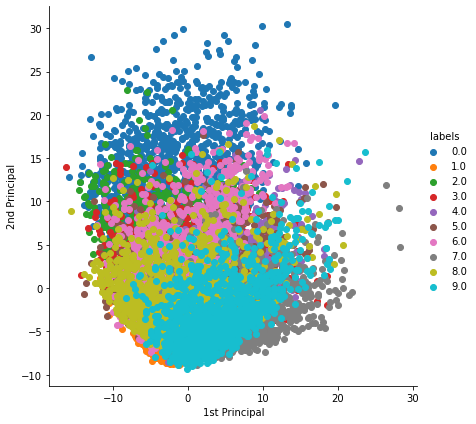

In [89]:
# plot the 2d datapoints present in the dataframe using Seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue = "labels",height=6).map(plt.scatter,'1st Principal','2nd Principal').add_legend()
plt.show()

In [90]:
#  Above steps of PCA could be achieved very quicklty using Scikit Learn

from sklearn import decomposition
pca = decomposition.PCA()

In [125]:
# define no. of components

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#PCA transforms the entire data of 15000 samples int 2D as below 
# from calculation of covariance matrix, eigen values and eigen vectors have been taken care by pca.fit_transform
print("the shape of the pca data is", pca_data.shape)
print(label.shape)
print(pca_data.shape)

the shape of the pca data is (15000, 2)
(15000,)
(15000, 2)


(15000, 3)


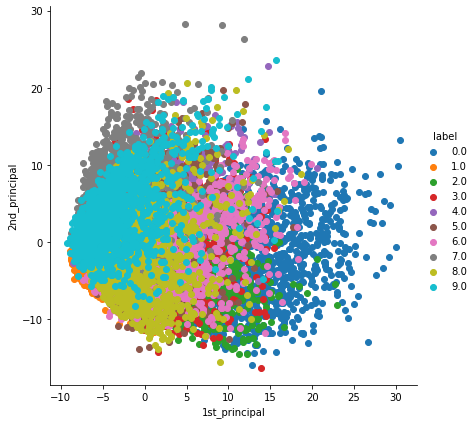

In [127]:
pcaa_data = np.vstack((pca_data.T, label)).T
print(pcaa_data.shape)
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pcaa_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


<img src = "PCA_for_n_dim.png">


While converting from PCA 784 dimensional data to d` dimensions, it is considered good ifwe are able to retain 90% data 
ie. Varianceshould be about 90%

PCA for Dimensionality Reduction (Non Visualisation)

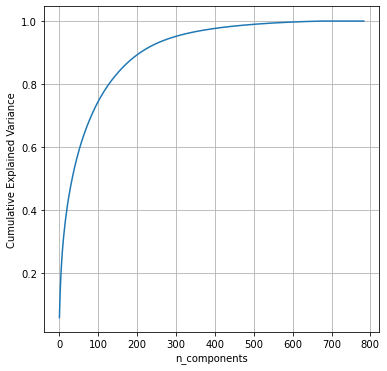

In [133]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_) #ie. lambda1/sum(lambdas) ie eigen values
# print(percentage_var_explained)
cum_variance_explained = np.cumsum(percentage_var_explained) # this is cum sum of eigen values

plt.figure(1,figsize=(6,6))
plt.clf()
plt.plot(cum_variance_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

From the above plot , it is very clear that we can retain 90% information/ variance if we are reducing dimensionality to 200

In [4]:
#Standardizing the data ie mean 0 and std deviation is 1 for all the 42000 datapoints in the matrix
import pandas as pd
df = pd.read_csv('mnist_train.csv')
df.head()

label = df['label']
data = df.drop('label',axis=1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
type(standardized_data)

(42000, 784)


numpy.ndarray

In [22]:
from sklearn.manifold import TSNE

In [23]:
data_1000 = standardized_data[0:1000]
labels_1000 = label[0:1000]
print(labels_1000.shape)
model = TSNE(n_components=2,random_state= 0)
tsne_data = model.fit_transform(data_1000)
print(tsne_data.shape)

(1000,)
(1000, 2)


In [24]:
print("Labels shape :",labels_1000.shape)
print("First Label : ",labels_1000[1])
print("TSNE Data shape :", tsne_data.shape)
print("First TSNE Data :", tsne_data[1])

Labels shape : (1000,)
First Label :  0
TSNE Data shape : (1000, 2)
First TSNE Data : [ 19.457382 -35.80517 ]


In [25]:
import numpy as np
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
print(tsne_data)

[[  1.00450456  14.97686768   1.        ]
 [ 19.4573822  -35.80516815   0.        ]
 [ -8.25186539   0.75288457   1.        ]
 ...
 [-36.4671936   14.76201248   9.        ]
 [ 43.22276306  -6.05690432   6.        ]
 [-17.469944    24.77114105   4.        ]]


In [26]:
print(tsne_data.shape)

(1000, 3)


In [27]:
tsne_df = pd.DataFrame(data = tsne_data,columns=("Dim_1","Dim_2","Digit"))

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt 


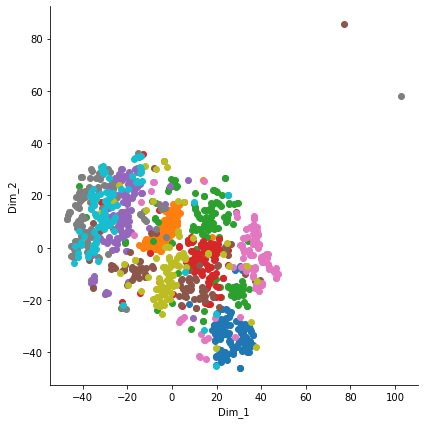

In [32]:
sns.FacetGrid(tsne_df,hue='Digit', size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.show()